# Previsão de renda


## Etapa 1 CRISP - DM: Entendimento do negócio

**Objetivo**:

Prever a renda mensal de clientes com base em características demográficas, econômicas e sociais. O modelo ajudará instituições financeiras a otimizar estratégias de crédito e reduzir riscos financeiros.


## Etapa 2 Crisp-DM: Entendimento dos dados

Nesta etapa, o foco é entender as características do conjunto de dados que será utilizado no projeto de previsão de renda. Essa análise inicial é muito importante para garantir que os dados estejam adequados para o objetivo do modelo e para identificar eventuais problemas, como valores ausentes ou outliers. O conjunto de dados foi fornecido pela EBAC para a realizaçao desse projeto.


### Dicionário de dados

| **Variável**             | **Descrição**                                         | **Tipo**       |
|------------------------- |------------------------------------------------------ |----------------|
| **data_ref**             | Data de referência                                    | `object`       |
| **id_cliente**           | Identificador único do cliente                        | `int64`        |
| **sexo**                 | Gênero do cliente (`F` ou `M`)                        | `object`       |
| **posse_de_veiculo**     | Indica se o cliente possui veículo (`True` ou `False`)| `bool`         |
| **posse_de_imovel**      | Indica se o cliente possui imóvel (`True` ou `False`) | `bool`         |
| **qtd_filhos**           | Quantidade de filhos do cliente                       | `int64`        |
| **tipo_renda**           | Categoria da fonte de renda                           | `object`       |
| **educacao**             | Nível educacional                                     | `object`       |
| **estado_civil**         | Estado civil do cliente                               | `object`       |
| **tipo_residencia**      | Tipo de residência                                    | `object`       |
| **idade**                | Idade do cliente em anos                              | `int64`        |
| **tempo_emprego**        | Tempo de emprego em anos                              | `float64`      |
| **qt_pessoas_residencia**| Número de pessoas na residência                       | `float64`      |
| **renda**                | Renda mensal do cliente                               | `float64`      |



#### Carregando os pacotes

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

%matplotlib inline

#### Carregando os dados

In [2]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [3]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
print("Informações gerais:")
renda.info()
print("\nDescrição estatística:")
print(renda.describe())

Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-n

#### Visualização de Distribuições da variável Renda

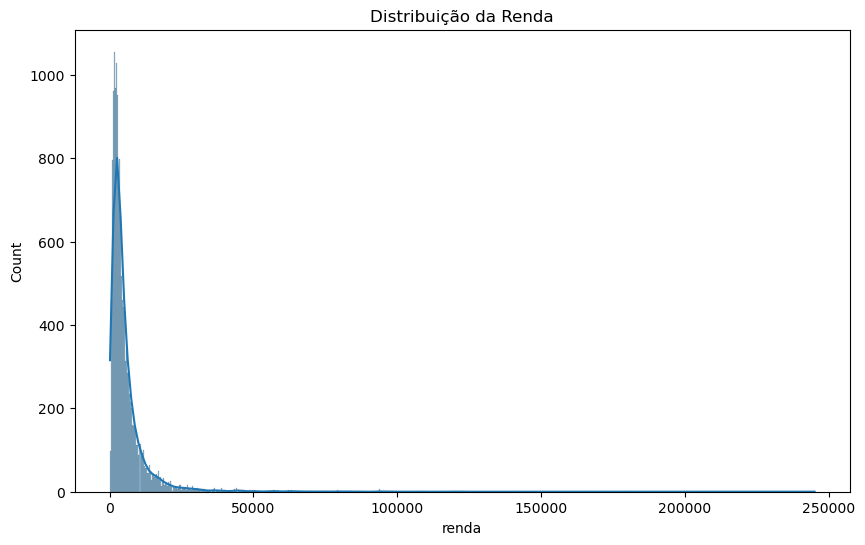

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(renda['renda'], kde=True)
plt.title('Distribuição da Renda')
plt.show()


#### Histograma das Variaveis Continuas:

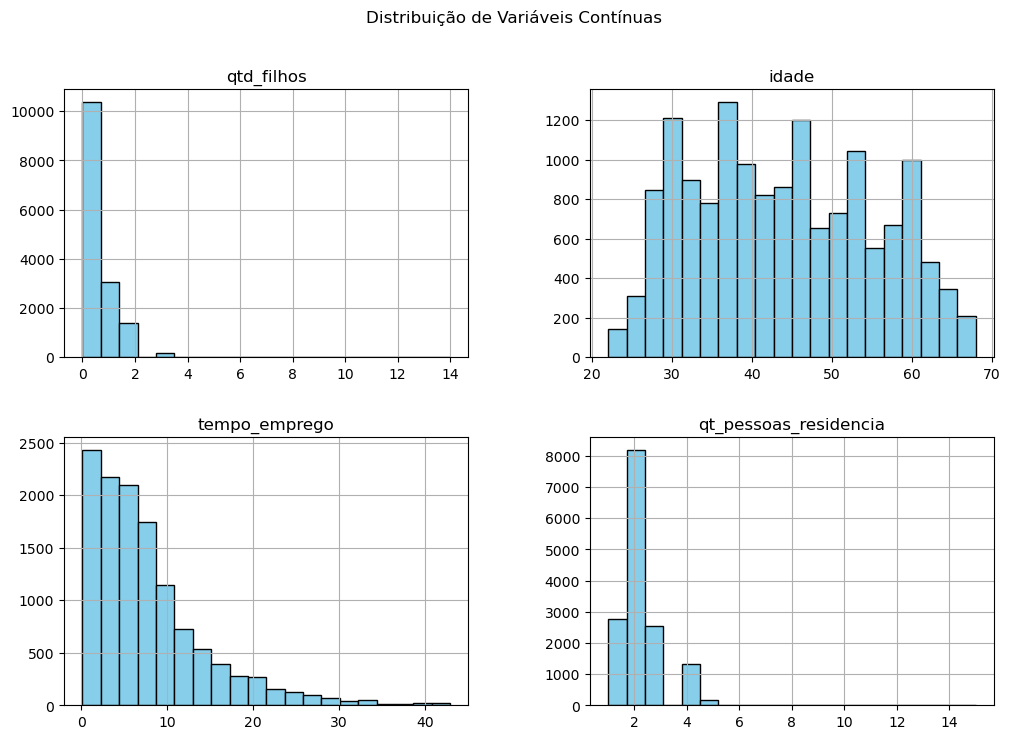

In [7]:
renda[['qtd_filhos','idade', 'tempo_emprego', 'qt_pessoas_residencia']].hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Distribuição de Variáveis Contínuas")
plt.show()

##### **Observamos indícios de presença de outliers atraves da distribuição das barras.**

Vamos confirmar esses outliers através de um resumo estatístico:

- A variável qtd_filhos possui 75% do valor abaixo de 1 enquanto o máximo é 14;
- O tempo_emprego possui 75% do valor abaixo de 10.12 enquanto o máximo é 42.9.

In [8]:
#Resumo Estatistico das variaveis numericas
renda.describe()

,Unnamed: 0,id_cliente,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
count,15000.000000,15000.000000,15000.000000,15000.000000,12427.000000,15000.000000,15000.000000
mean,7499.500000,8304.871400,0.432333,43.882333,7.722635,2.206400,5697.287057
std,4330.271354,4797.780446,0.746631,11.273155,6.711189,0.909792,8266.816289
min,0.000000,1.000000,0.000000,22.000000,0.117808,1.000000,118.710000
25%,3749.750000,4181.000000,0.000000,34.000000,2.973973,2.000000,2026.110000
50%,7499.500000,8297.000000,0.000000,43.000000,6.013699,2.000000,3499.720000
75%,11249.250000,12403.000000,1.000000,53.000000,10.120548,3.000000,6392.167500
max,14999.000000,16649.000000,14.000000,68.000000,42.906849,15.000000,245141.670000


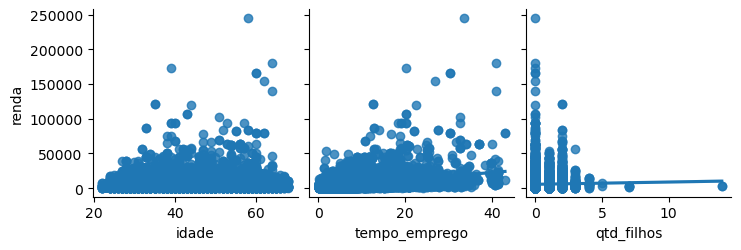

In [9]:
# Graficos para avaliar relações entre variáveis:
sns.pairplot(renda, x_vars=['idade', 'tempo_emprego', 'qtd_filhos'], y_vars='renda', kind='reg')
plt.show()


#### Distribuição da variavel Quantidade de filhos:

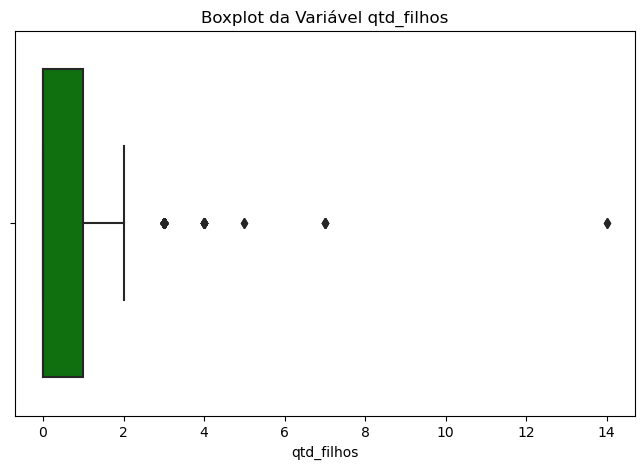

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=renda['qtd_filhos'], color='green')
plt.title('Boxplot da Variável qtd_filhos', fontsize=12)
plt.show()

In [11]:
#Remocao dos outliars para limite maximo de 6 filhos
renda = renda[renda['qtd_filhos'] < 6]

#### Distribuição da variavel Tempo de Emprego:

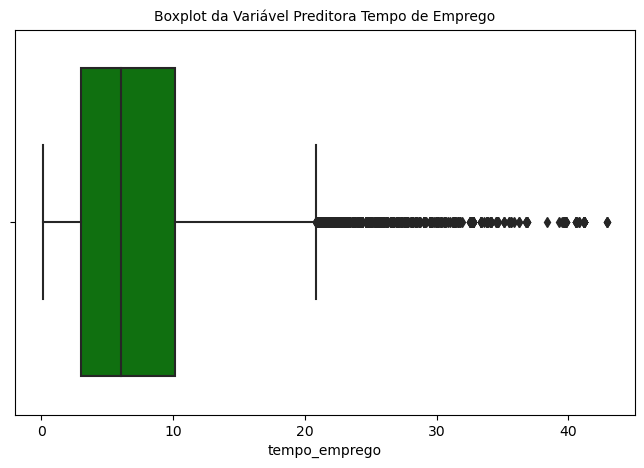

In [12]:
# Verificar outliers tempo_emprego
plt.figure(figsize=(8, 5))
sns.boxplot(x=renda['tempo_emprego'], color='green')
plt.title('Boxplot da Variável Preditora Tempo de Emprego', fontsize=10)
plt.show()


**Observacoes:**
- Média: 7.72.
- Mínimo: 0.12 (aproximadamente 1 mês).
- Máximo: 42.91.

O máximo de 42.91 pode indicar um possível erro ou um caso muito atípico (emprego iniciado muito jovem). Irei corrigir o outlier para melhorar os dados de analise, limitando para 30 anos maximo.

In [13]:
#Remocao dos outliars: todo valor acima de 30 anos
renda = renda[renda['tempo_emprego'] <= 30]


**Avaliação de Cada Variavel Qualitativa**

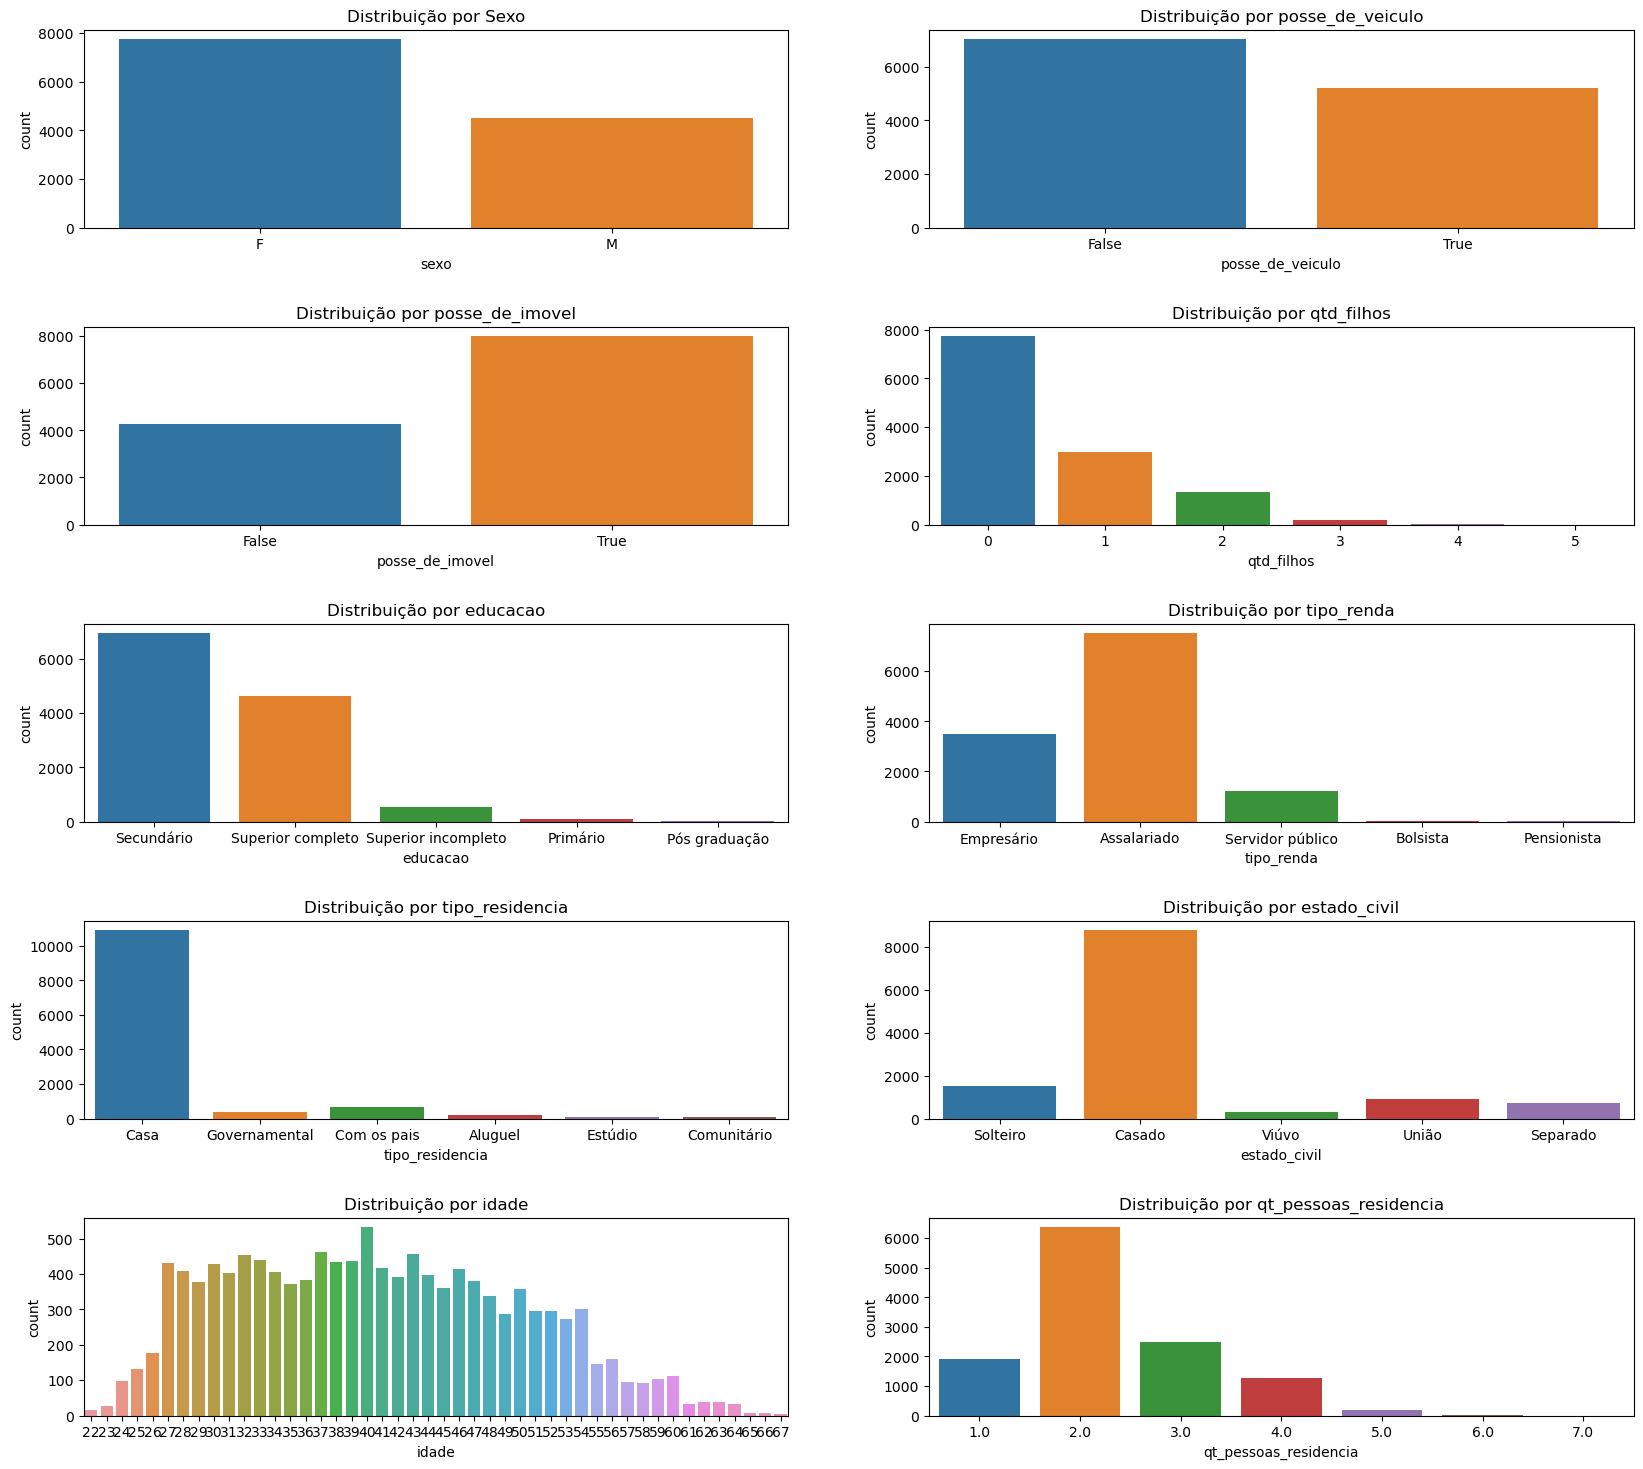

In [14]:
plt.rc('figure', figsize=(20,18))
fig, axes = plt.subplots(5, 2)

sns.countplot(ax = axes[0, 0], x='sexo', data=renda).set_title('Distribuição por Sexo')
sns.countplot(ax = axes[0, 1], x='posse_de_veiculo', data=renda).set_title('Distribuição por posse_de_veiculo')
sns.countplot(ax = axes[1, 0], x='posse_de_imovel', data=renda).set_title('Distribuição por posse_de_imovel')
sns.countplot(ax = axes[1, 1], x='qtd_filhos', data=renda).set_title('Distribuição por qtd_filhos')
sns.countplot(ax = axes[2, 1], x='tipo_renda', data=renda).set_title('Distribuição por tipo_renda')
sns.countplot(ax = axes[2, 0], x='educacao', data=renda).set_title('Distribuição por educacao')
sns.countplot(ax = axes[3, 1], x='estado_civil', data=renda).set_title('Distribuição por estado_civil')
sns.countplot(ax = axes[3, 0], x='tipo_residencia', data=renda).set_title('Distribuição por tipo_residencia')
sns.countplot(ax = axes[4, 1], x='qt_pessoas_residencia', data=renda).set_title('Distribuição por qt_pessoas_residencia')
sns.countplot(ax = axes[4, 0], x='idade', data=renda).set_title('Distribuição por idade')

plt.subplots_adjust(wspace=0.2, hspace=0.5)

### Entendimento dos dados - Bivariadas




Análise bivariada ajuda a identificar relações entre variáveis preditoras e a variável target (renda).

O grafico apresenta uma visualização simétrica que significa que a distribuição dos dados é equilibrada de forma semelhante dos dois lados de um ponto central, indicando que a distribuição dos valores da variável não tem uma tendência clara para valores mais altos ou mais baixos, e que a média e a mediana estão próximas.

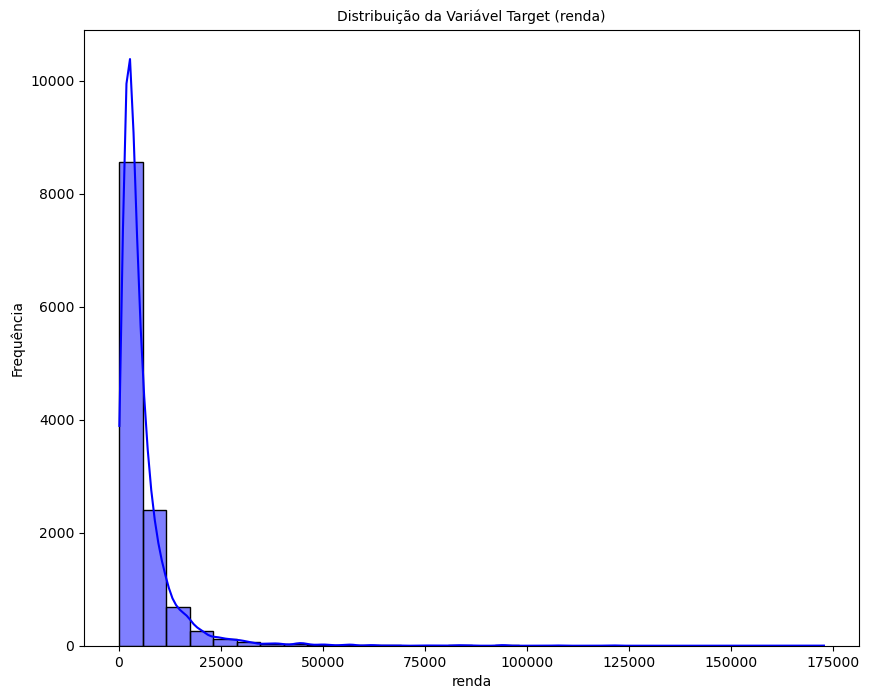

In [15]:
# Visualizar a distribuição da variável target
plt.figure(figsize=(10, 8))
y=renda['renda']
sns.histplot(y, kde=True, bins=30, color='blue')
plt.title('Distribuição da Variável Target (renda)', fontsize=10)
plt.xlabel('renda')
plt.ylabel('Frequência')
plt.show()


#### **Renda vs. Quantidade de Filhos**:

Como o valor está muito perto de zero, podemos interpretar que praticamente não há uma relação linear significativa entre a quantidade de filhos e a renda.

Possível Influência de Outras Variáveis:
Esse resultado indica que outras variáveis podem ter uma influência muito maior sobre a renda do que a quantidade de filhos.

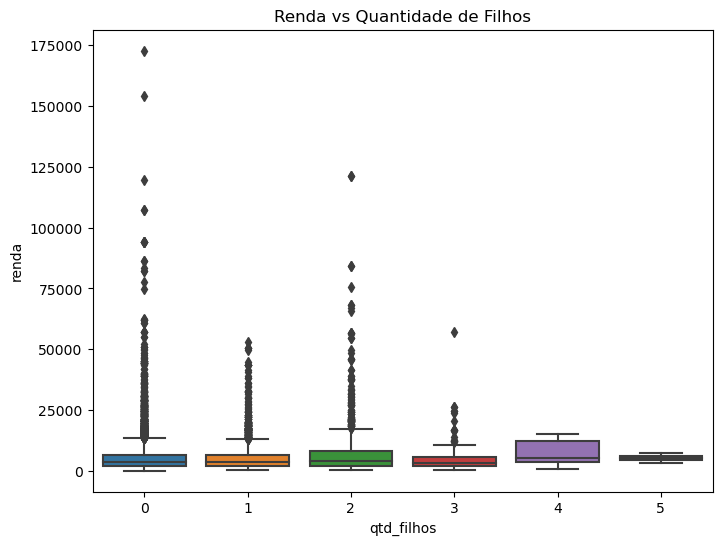

               renda  qtd_filhos
renda       1.000000    0.027271
qtd_filhos  0.027271    1.000000


In [16]:
#Renda vs. Quantidade de Filhos (qtd_filhos)
# Gráfico de boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='qtd_filhos', y='renda', data=renda)
plt.title('Renda vs Quantidade de Filhos')
plt.show()

# Cálculo da correlação
correlacao = renda[['renda', 'qtd_filhos']].corr()
print(correlacao)

#### **Renda vs. Idade** : Relação Linear Inexistente

Como o valor está muito próximo de zero, podemos concluir que não há uma relação linear relevante entre idade e renda. 
Isso significa que a idade, isoladamente, não explica as variações na renda.

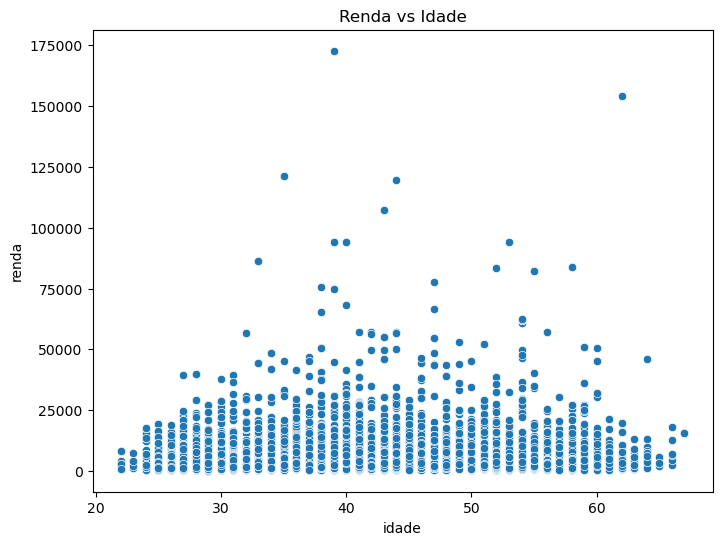

          renda     idade
renda  1.000000  0.086638
idade  0.086638  1.000000


In [17]:
#Renda vs. Idade (idade)
# Gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x='idade', y='renda', data=renda)
plt.title('Renda vs Idade')
plt.show()

# Cálculo da correlação
correlacao = renda[['renda', 'idade']].corr()
print(correlacao)


#### **Renda vs. Quantidade de Pessoas na Residência:**

Influência Quase Nula: 
Esse valor próximo de zero indica que a quantidade de pessoas na residência tem pouca ou nenhuma influência direta na renda.

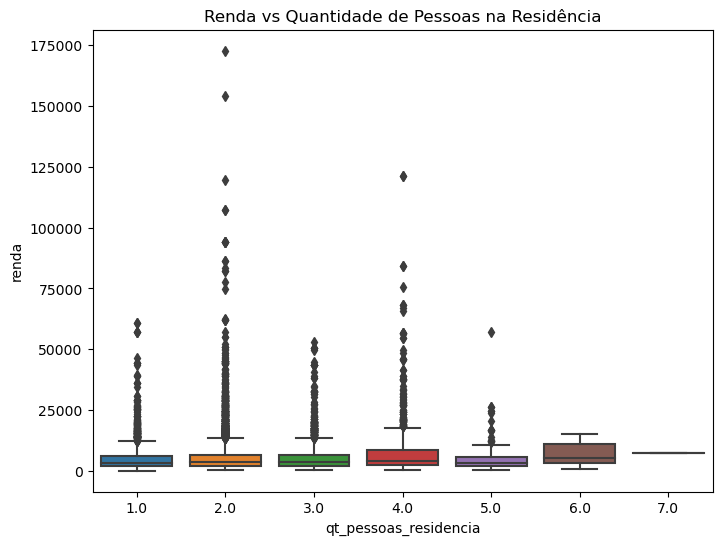

                          renda  qt_pessoas_residencia
renda                  1.000000               0.041694
qt_pessoas_residencia  0.041694               1.000000


In [18]:
# Renda vs. Quantidade de Pessoas na Residência (qt_pessoas_residencia)
# Gráfico de boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='qt_pessoas_residencia', y='renda', data=renda)
plt.title('Renda vs Quantidade de Pessoas na Residência')
plt.show()

# Cálculo da correlação
correlacao = renda[['renda', 'qt_pessoas_residencia']].corr()
print(correlacao)


#### **Correlação entre renda e tempo de emprego: Positiva Moderada**

A correlação entre a renda (renda) e o tempo de emprego (tempo_emprego) foi de aproximadamente 0.345237.

Isso indica uma relação positiva moderada: pessoas com mais tempo de emprego tendem a ter uma renda mais alta.

Esse resultado faz sentido, pois, com o passar dos anos, os profissionais acumulam experiência, o que pode resultar em promoções e aumentos salariais.

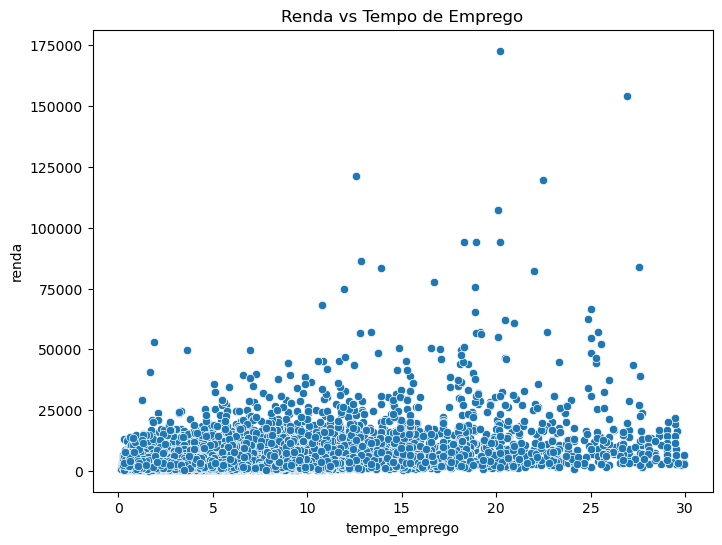

                  renda  tempo_emprego
renda          1.000000       0.345209
tempo_emprego  0.345209       1.000000


In [19]:
# Gráfico de dispersão entre renda e tempo de emprego
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tempo_emprego', y='renda', data=renda)
plt.title('Renda vs Tempo de Emprego')
plt.show()

# Cálculo da correlação
correlacao = renda[['renda', 'tempo_emprego']].corr()
print(correlacao)


## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Seleção das variaveis relevantes
 - **limpeza**: Identificação e tratamento de dados faltantes e deteccao de outliers - tratado na etapa anterior 
 - **construção**: Construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis



In [20]:
renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [21]:
# Seleçao:
df = renda.drop(columns=['Unnamed: 0', 'id_cliente', 'data_ref'])

In [22]:
# Tratar valores ausentes:
df = df.dropna() 

In [23]:
#Remocao de ouliers da variavel Renda
df = df[(df['renda'] <= 20000) & (df['renda'] >= 500)]

In [24]:
df = pd.get_dummies(df, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Seleção da técnica de modelagem
- Desenho do teste
- Avaliação do modelo


In [25]:
#Divisao do dataset em treino e teste:
X = df.drop(['renda'], axis=1)
y = df['renda']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### Modelo de Regressao Linear pelo: Statsmodel

In [26]:
# Adicionando o termo de intercepto
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Converter colunas booleanas para inteiros (0 e 1)
X_train_sm = X_train_sm.astype(float)
X_train_sm = X_train_sm.applymap(lambda x: 1 if x == True else 0 if x == False else x)


# Treinando o modelo com Statsmodels
model_statsmodels = sm.OLS(y_train, X_train_sm).fit()
model_statsmodels.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     122.1
Date:                Thu, 23 Jan 2025   Prob (F-statistic):               0.00
Time:                        01:33:08   Log-Likelihood:                -78193.
No. Observations:                8211   AIC:                         1.564e+05
Df Residuals:                    8186   BIC:                         1.566e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          -127.8078   1303.774     -0.098      0.922   -2683.535    2427.920
qtd_filhos                     -625.1029    597.877     -1.046      0.296   -1797.094     546.888
idade                            20.9175      4.514      4.634      0.000      12.069      29.766
tempo_emprego                   259.8800      6.617     39.277      0.000     246.910     272.850
qt_pessoas_residencia           831.9855    596.360      1.395      0.163    -337.032    2001.003
sexo_M                         3048.6266     83.938     36.320      0.000    2884.088    3213.166
posse_de_veiculo_True           132.7815     80.098      1.658      0.097     -24.232     289.795
posse_de_imovel_True            283.4715     78.902      3.593      0.000     128.803     438.140
tipo_renda_Bolsista             428.3326   1356.084      0.316      0.752   -2229.935    3086.600
tipo_renda_Empresário           683.5594     83.807      8.156      0.000     519.277     847.842
tipo_renda_Pensionista        -2097.6188   1487.328     -1.410      0.158   -5013.159     817.921
tipo_renda_Servidor público     323.4273    127.607      2.535      0.011      73.286     573.569
educacao_Pós graduação         -764.3225    885.282     -0.863      0.388   -2499.700     971.055
educacao_Secundário            -305.2310    413.754     -0.738      0.461   -1116.294     505.832
educacao_Superior completo       96.4117    415.339      0.232      0.816    -717.759     910.582
educacao_Superior incompleto   -476.9411    445.534     -1.070      0.284   -1350.301     396.419
estado_civil_Separado           848.1255    616.440      1.376      0.169    -360.254    2056.505
estado_civil_Solteiro           667.8555    601.732      1.110      0.267    -511.692    1847.403
estado_civil_União             -140.7523    141.077     -0.998      0.318    -417.300     135.795
estado_civil_Viúvo              823.0385    640.238      1.286      0.199    -431.990    2078.067
tipo_residencia_Casa           -896.7840    297.416     -3.015      0.003   -1479.794    -313.774
tipo_residencia_Com os pais    -641.8805    332.053     -1.933      0.053   -1292.789       9.028
tipo_residencia_Comunitário    -854.6517    603.574     -1.416      0.157   -2037.811     328.507
tipo_residencia_Estúdio        -796.1119    582.505     -1.367      0.172   -1937.970     345.746
tipo_residencia_Governamental -1585.7067    366.906     -4.322      0.000   -2304.936    -866.478
==============================================================================
Omnibus:                     1779.296   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3721.077
Skew:                           1.272   Prob(JB):                         0.00
Kurtosis:              

In [27]:
# Fazendo previsões
y_pred_statsmodels = model_statsmodels.predict(X_test_sm)

# Avaliando o modelo
mse_statsmodels = mean_squared_error(y_test, y_pred_statsmodels)
mae_statsmodels = mean_absolute_error(y_test, y_pred_statsmodels)
r2_statsmodels = r2_score(y_test, y_pred_statsmodels)

print(f"Statsmodels - MSE: {mse_statsmodels:.2f}, MAE: {mae_statsmodels:.2f}, R²: {r2_statsmodels:.2f}")

Statsmodels - MSE: 10703865.28, MAE: 2437.34, R²: 0.27


In [28]:
# Treinando o modelo Ridge
ridge = Ridge(alpha=0.1).fit(X_train, y_train)

# Fazendo previsões
y_pred_ridge = ridge.predict(X_test)

# Avaliando o modelo
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge - MSE: {mse_ridge:.2f}, MAE: {mae_ridge:.2f}, R²: {r2_ridge:.2f}")

Ridge - MSE: 10703669.71, MAE: 2437.30, R²: 0.27


In [29]:
# Treinando o modelo Lasso
lasso = Lasso(alpha=10).fit(X_train, y_train)

# Fazendo previsões
y_pred_lasso = lasso.predict(X_test)

# Avaliando o modelo
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso - MSE: {mse_lasso:.2f}, MAE: {mae_lasso:.2f}, R²: {r2_lasso:.2f}")


Lasso - MSE: 10703780.03, MAE: 2434.58, R²: 0.27


In [30]:
#Arvore de Decisao
tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [31]:
def avaliar_modelo(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

y_pred_tree = tree.predict(X_test)
mse, mae, r2 = avaliar_modelo(y_test, y_pred_tree)
print(f"Árvore de Decisão - MSE: {mse}, MAE: {mae}, R²: {r2}")


Árvore de Decisão - MSE: 10439283.714040466, MAE: 2373.354747268975, R²: 0.28764842908427746


## Etapa 5 Crisp-DM: Avaliação dos resultados


### **Análise dos Resultados dos Modelos**


| **Modelo**          | **MSE**       | **MAE**       | **R²**   |
|---------------------|---------------|---------------|----------|
| **Statsmodels**     | 10,703,865.28 | 2,437.34      | 0.27     |
| **Ridge**           | 10,703,669.71 | 2,437.30      | 0.27     |
| **Lasso**           | 10,703,780.03 | 2,434.58      | 0.27     |
| **Árvore de Decisão**| 10,439,283.71 | 2,373.35      | 0.29     |

---

### **Interpretação das Métricas**

**1. Mean Squared Error (MSE):**
- O **MSE** mede o erro médio ao quadrado entre as previsões e os valores reais. Quanto menor, melhor.
- **Árvore de Decisão** apresentou o menor MSE, indicando que ela tem o menor erro médio ao prever a renda.

**2. Mean Absolute Error (MAE):**
- O **MAE** mede o erro absoluto médio entre as previsões e os valores reais, em unidades monetárias. Também é desejável que seja o menor possível.
- **Árvore de Decisão** novamente se destacou com o menor MAE (2,373.35), indicando que as previsões estão, em média, mais próximas dos valores reais.

**3. Coeficiente de Determinação (R²):**
- O **R²** mede a proporção da variância nos dados que é explicada pelo modelo. Valores mais próximos de 1 indicam melhor desempenho.
- A **Árvore de Decisão** obteve o maior R² (0.29), explicando cerca de 29% da variação nos dados. Enquanto isso, os outros modelos lineares explicaram cerca de 27%.

---

**Conclusão**:
   - Os modelos **Statsmodels**, **Ridge**, e **Lasso** apresentaram métricas bem parecidas.
   - A **Árvore de Decisão** teve um desempenho um pouco superior em todas as métricas. 

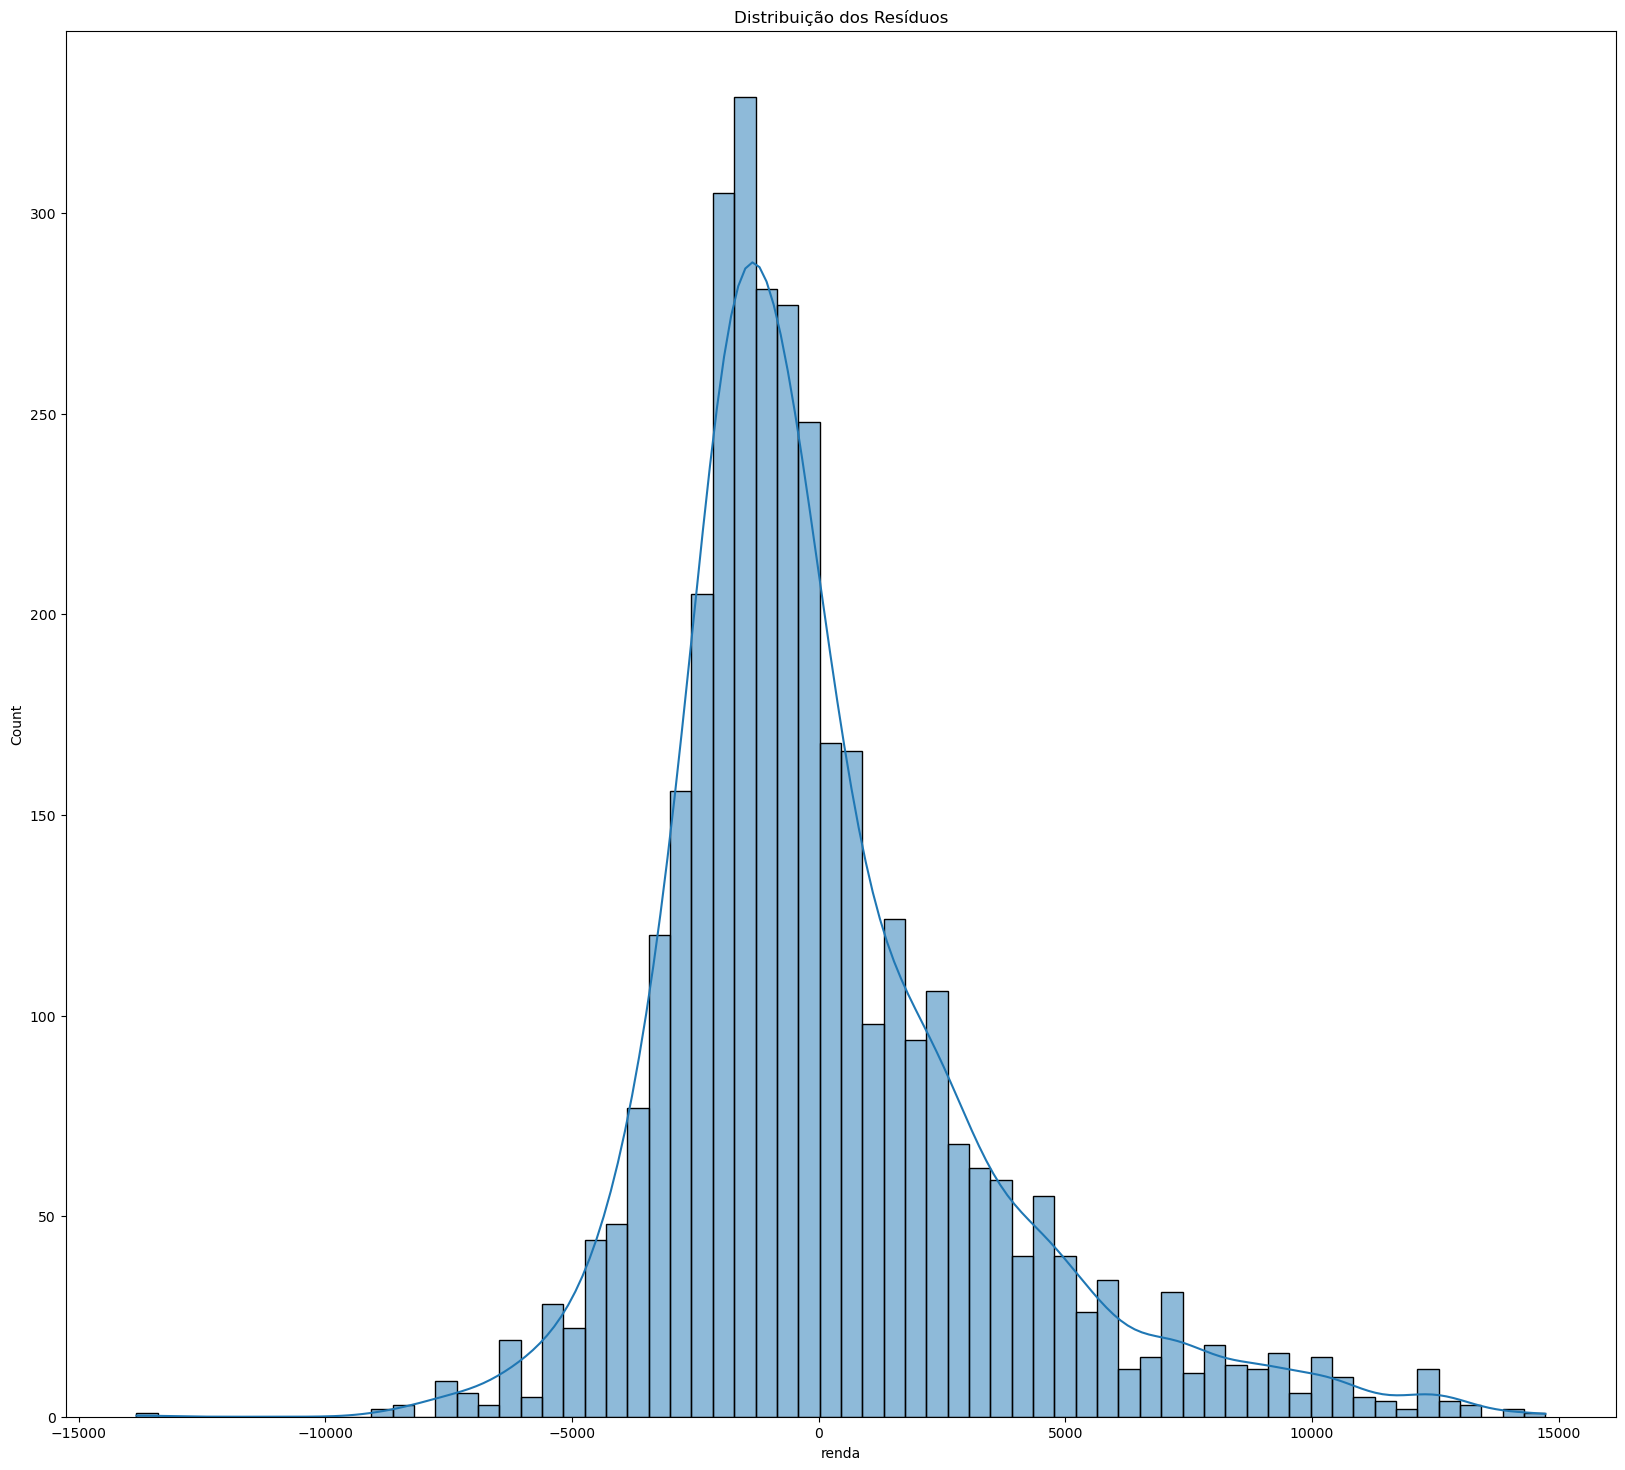

In [32]:
#Grafico de Residuos para Arvore de Decisao
residuals = y_test - y_pred_tree  
sns.histplot(residuals, kde=True)
plt.title("Distribuição dos Resíduos")
plt.show()


In [33]:
#validação cruzada para garantir que o desempenho dos modelos seja consistente em diferentes divisões dos dados:
scores = cross_val_score(tree, X, y, cv=5, scoring='r2')
print(f"Árvore de Decisão - R² médio (cross-validation): {scores.mean():.2f}")


Árvore de Decisão - R² médio (cross-validation): 0.27


## Etapa 6 Crisp-DM: Implantação


Nesta etapa, o modelo preditivo desenvolvido foi preparado para ser integrado em um ambiente operacional, permitindo que ele seja utilizado para prever a renda dos clientes em tempo real ou em análises periódicas.

**Criação de uma Interface de Usuário:**
   - Foi desenvolvido um aplicativo simples usando **Streamlit**, onde os analistas ou operadores podem inserir as informações dos clientes, como idade, escolaridade, estado civil, entre outros. O aplicativo retorna imediatamente a previsão de renda do cliente.
   - O video com a demonstraçao desse app está disponivel no README do Github.